## LOAD LIBS and image to analyze

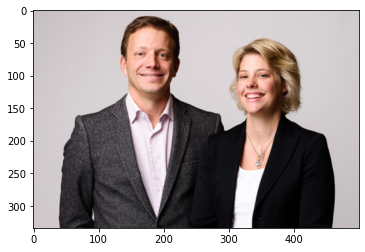

In [16]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

IMAGE_PATH = r'res\couple.jpg'
detector = MTCNN()
image = cv2.imread(IMAGE_PATH)
# cv2.imshow("image",image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Detect the faces

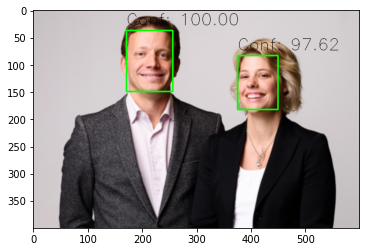

In [17]:
fontScale = 1
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 255, 0)
thickness = 2

image = cv2.resize(image, (600,400))
boxes = detector.detect_faces(image)

if boxes:
    for box in boxes:
        box_analyze = box['box']
        conf_analyze = box['confidence']

        x, y, width, height = box_analyze[0], box_analyze[1], box_analyze[2], box_analyze[3]

        if conf_analyze > 0.5:
            cv2.rectangle(image, (x, y), (x + width, y + height), color, thickness)
            cv2.putText(image, "Conf: {0:.2f}".format(conf_analyze*100),
                        (x, y-10), font, fontScale, thickness)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


## Using haarcascade_frontalface_alt2.xml from OpenCV

In [20]:
import os
cascPath = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

image = cv2.imread(IMAGE_PATH)
image = cv2.resize(image, (600,400))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,
                                    scaleFactor=1.1,
                                    minNeighbors=5,
                                    minSize=(60, 60),
                                    flags=cv2.CASCADE_SCALE_IMAGE)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices